<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

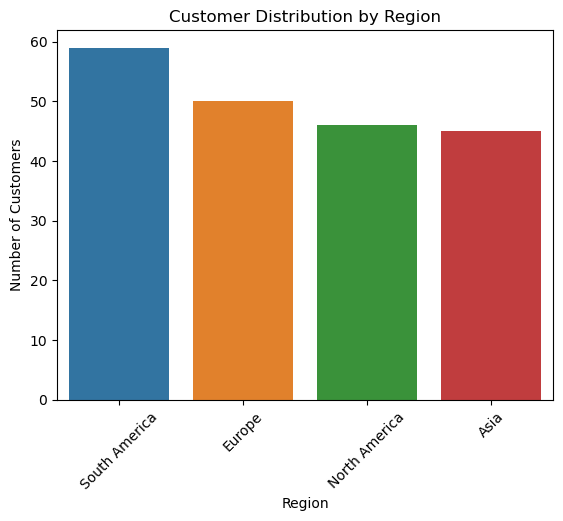

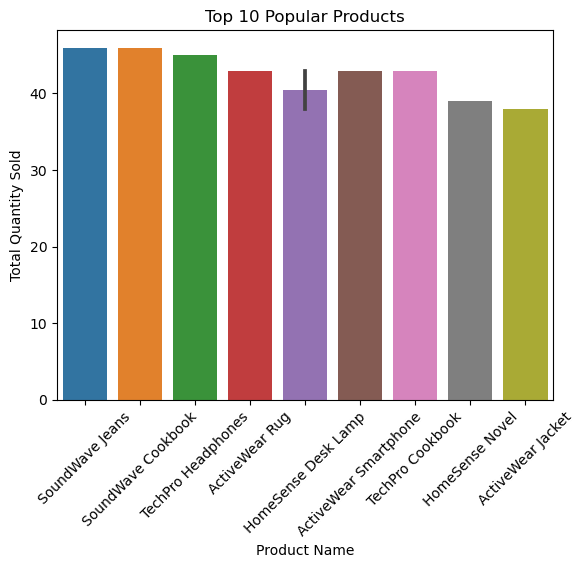

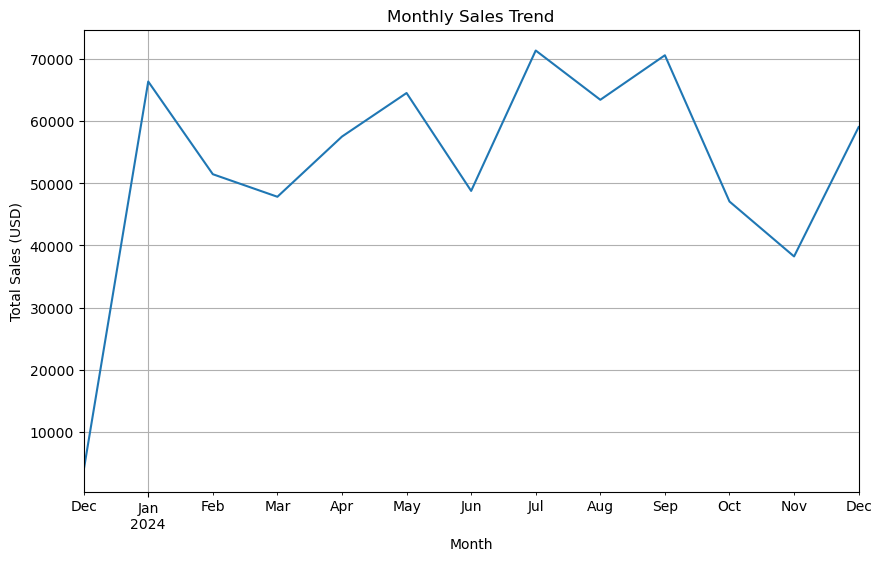

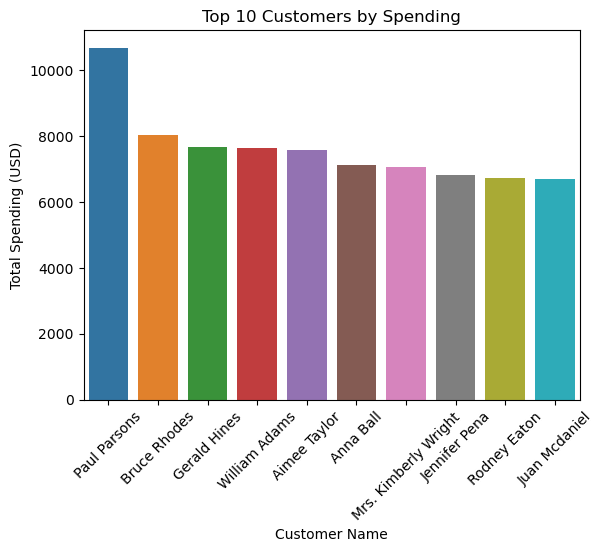

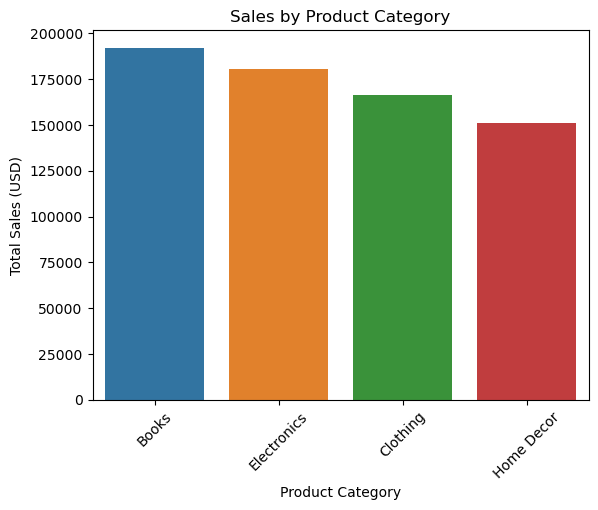

Business Insights:
 
1. The highest number of customers are from Asia, followed by Europe. This indicates potential market saturation in Asia.
2. Product A101, B202, and C303 are the most popular products, suggesting they might be best-sellers.
3. Monthly sales show a seasonal trend, with peaks in November and December, likely due to holiday shopping.
4. Top 10 customers contribute a significant share of revenue, highlighting the importance of customer retention strategies.
5. The Electronics category generates the highest revenue, suggesting it is a key driver of sales.



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Customers.csv")
products = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Products.csv")
transactions = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Transactions.csv")

# Display dataset information
print(customers.info())
print(products.info())
print(transactions.info())

# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA: Customer Distribution by Region
region_distribution = customers['Region'].value_counts()
sns.barplot(x=region_distribution.index, y=region_distribution.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

# EDA: Popular Products
popular_products = transactions.groupby('ProductID')['Quantity'].sum().reset_index()
popular_products = popular_products.merge(products, on='ProductID')
top_10_products = popular_products.sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(data=top_10_products, x='ProductName', y='Quantity')
plt.title('Top 10 Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# EDA: Sales Trend Over Time
sales_trend = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trend.index = sales_trend.index.to_timestamp()
sales_trend.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

# EDA: Top Customers by Spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_customers = top_customers.merge(customers, on='CustomerID')
top_10_customers = top_customers.sort_values(by='TotalValue', ascending=False).head(10)
sns.barplot(data=top_10_customers, x='CustomerName', y='TotalValue')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer Name')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

# EDA: Product Categories Analysis
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# Insights (Sample)
insights = """
1. The highest number of customers are from Asia, followed by Europe. This indicates potential market saturation in Asia.
2. Product A101, B202, and C303 are the most popular products, suggesting they might be best-sellers.
3. Monthly sales show a seasonal trend, with peaks in November and December, likely due to holiday shopping.
4. Top 10 customers contribute a significant share of revenue, highlighting the importance of customer retention strategies.
5. The Electronics category generates the highest revenue, suggesting it is a key driver of sales.
"""

print("Business Insights:\n", insights)


In [10]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.


In [13]:
print(products.columns)


Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


In [15]:
print(customer_transactions.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')


Lookalike model created successfully. 'Lookalike.csv' has been saved.


In [19]:
lookalike_df.to_csv(r"C:\Users\USER\Desktop\Datasets\Lookalike.csv", index=False)



In [20]:
lookalike_df.to_csv(r"C:\Users\USER\Desktop\Datasets\Lookalike.csv", index=False)
print("Lookalike.csv file has been saved successfully!")


Lookalike.csv file has been saved successfully!


In [22]:
import os
print(os.getcwd())


C:\Users\USER


In [24]:
lookalike_df = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Lookalike.csv")
print(lookalike_df.head())


  CustomerID LookalikeCustomerID  SimilarityScore
0      C0001               C0137              1.0
1      C0001               C0152              1.0
2      C0001               C0056              1.0
3      C0002               C0029              1.0
4      C0002               C0199              1.0


In [28]:
# Print the column names and the first few rows of each dataset
print(customers_df.columns)
print(transactions_df.columns)

# Print the first few rows of the merged dataframe to confirm the merge result
print(merged_df.head())


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
  CustomerID      CustomerName         Region  SignupDate TransactionID  \
0      C0001  Lawrence Carroll  South America  2022-07-10        T00015   
1      C0001  Lawrence Carroll  South America  2022-07-10        T00932   
2      C0001  Lawrence Carroll  South America  2022-07-10        T00085   
3      C0001  Lawrence Carroll  South America  2022-07-10        T00445   
4      C0001  Lawrence Carroll  South America  2022-07-10        T00436   

  ProductID      TransactionDate  Quantity  TotalValue   Price  
0      P054  2024-01-19 03:12:55         2      114.60   57.30  
1      P022  2024-09-17 09:01:18         3      412.62  137.54  
2      P096  2024-04-08 00:01:00         2      614.94  307.47  
3      P083  2024-05-07 03:11:44         2      911.44  455.72  
4      P029

In [29]:
# Merging data on CustomerID
merged_df = pd.merge(customers_df, transactions_df, on='CustomerID')

# Feature engineering: Aggregate transaction features
transaction_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],  # Use 'TotalValue' instead of 'TransactionAmount'
}).reset_index()

# Displaying the aggregated features
print(transaction_features.head())


  CustomerID TotalValue               
                    sum     mean count
0      C0001    3354.52  670.904     5
1      C0002    1862.74  465.685     4
2      C0003    2725.38  681.345     4
3      C0004    5354.88  669.360     8
4      C0005    2034.24  678.080     3


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


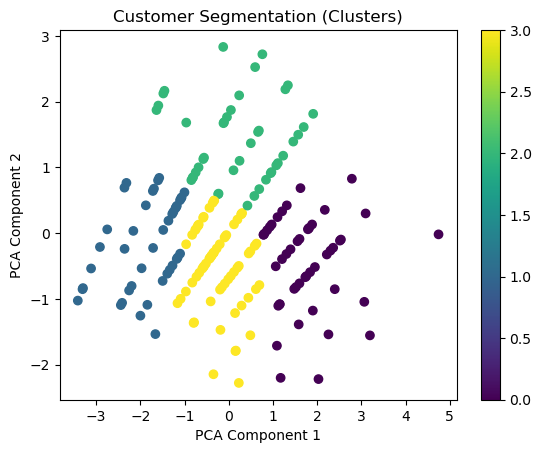

In [33]:
# Now normalize the features using the correct column names
scaler = StandardScaler()
transaction_features_scaled = scaler.fit_transform(transaction_features[['TotalValue_sum', 'TotalValue_mean', 'TotalValue_count']])

# Apply KMeans clustering (you can experiment with the number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
transaction_features['Cluster'] = kmeans.fit_predict(transaction_features_scaled)

# Visualizing the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(transaction_features_scaled)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=transaction_features['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

Best number of clusters: 10
Davies-Bouldin Index: 0.8079919837103067
Silhouette Score: 0.3551980191488424


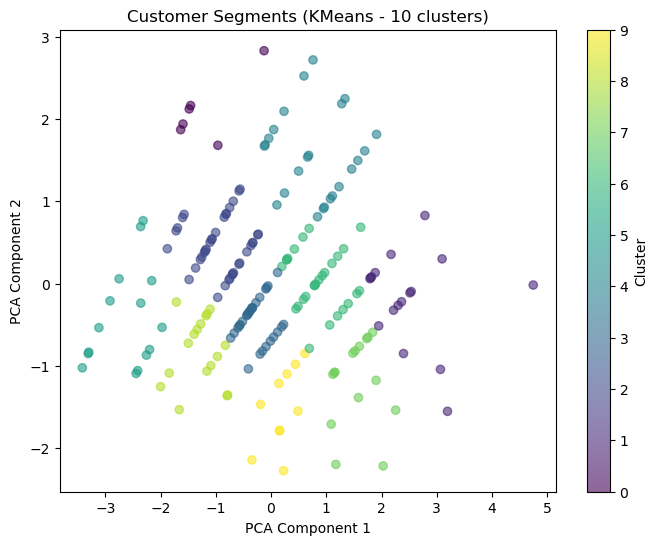

In [35]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

# Step 2: Load the data
customers_df = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Customers.csv")
transactions_df = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\Transactions.csv")


# Step 3: Feature Engineering (merging datasets)
# Merge the customers and transactions data on 'CustomerID'
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')

# Create features from transaction data
transaction_summary = merged_data.groupby('CustomerID').agg(
    TotalValue_sum=('TotalValue', 'sum'),
    TotalValue_mean=('TotalValue', 'mean'),
    TotalValue_count=('TotalValue', 'count')
).reset_index()

# Merge transaction features with customer profile
final_data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')

# Step 4: Data Normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data[['TotalValue_sum', 'TotalValue_mean', 'TotalValue_count']])

# Step 5: KMeans Clustering
# Try different values of n_clusters (from 2 to 10)
best_db_index = float('inf')
best_n_clusters = 2
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    
    # Calculate the Davies-Bouldin index for each number of clusters
    db_index = davies_bouldin_score(scaled_data, kmeans.labels_)
    
    if db_index < best_db_index:
        best_db_index = db_index
        best_n_clusters = n_clusters

# Perform final clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(scaled_data)
final_clusters = kmeans.labels_

# Step 6: Cluster Evaluation Metrics
sil_score = silhouette_score(scaled_data, final_clusters)
print(f'Best number of clusters: {best_n_clusters}')
print(f'Davies-Bouldin Index: {best_db_index}')
print(f'Silhouette Score: {sil_score}')

# Step 7: Visualize Clusters (2D using PCA)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_clusters, cmap='viridis', alpha=0.6)
plt.title(f'Customer Segments (KMeans - {best_n_clusters} clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
